#EEG Emotion Classifier

## Libraries

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

## Load Dataset

In [30]:
df = pd.read_csv('/content/drive/MyDrive/data/eeg-emotions/emotions.csv')
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [32]:
df.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


In [33]:
df.label.value_counts()

,count
label,
NEUTRAL,716
NEGATIVE,708
POSITIVE,708


## Preprocessing

In [34]:
df.columns

Index(['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a',
       'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a',
       ...
       'fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b',
       'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b', 'label'],
      dtype='object', length=2549)

In [35]:
df.columns = df.columns.str.strip()
df.rename(columns={'# mean_0_a': 'mean_0_a'}, inplace=True)
print(df['label'].value_counts())

label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64


In [36]:
df = df.dropna()

In [37]:
print(df['label'].value_counts())

label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64


In [38]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split

# Encode label
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Split features and labels
X = df.drop(columns=['label', 'label_encoded'])
y = df['label_encoded']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Cross Validation

In [39]:
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestClassifier

model_cv = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(model_cv, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.98126464 0.99063232 0.99061033 0.98591549 0.98591549]
Mean accuracy: 0.9868676540115008
Standard deviation: 0.003503921603941681


## Model Train

In [40]:
# from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred = model.predict(X_test)

In [42]:
y_pred

array([1, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1,
       0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1,
       2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0,
       0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2,
       0, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0,
       0, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0,
       2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1,
       1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0,
       0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2,
       2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0,

## Model Evaluation

Accuracy: 0.9882903981264637
              precision    recall  f1-score   support

    NEGATIVE       0.97      0.99      0.98       143
     NEUTRAL       1.00      1.00      1.00       148
    POSITIVE       0.99      0.97      0.98       136

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427



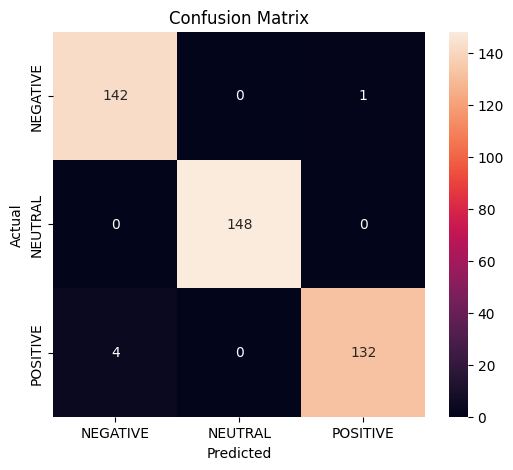

In [43]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import seaborn as sns
# import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

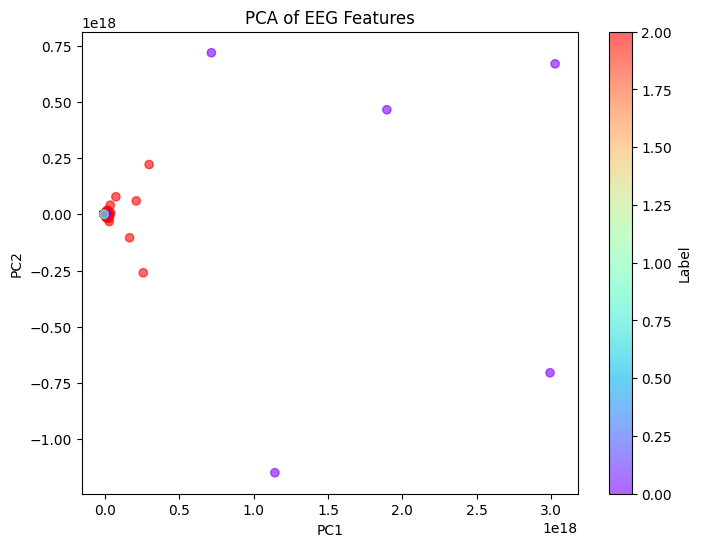

In [44]:
# from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap='rainbow', alpha=0.6)
plt.title("PCA of EEG Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Label')
plt.show()

In [45]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9883
